# tmang002 - 33551591 - Talha Mangarah - IS53023C - Part 2 (Late Submission)

In [25]:
#Import libs
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import math

In [2]:
#Import data & normalise
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
unnormal_train_data = pd.read_csv('creditdefault_train.csv',header='infer')
unnormal_test_data = pd.read_csv('creditdefault_test.csv',header='infer')
scaler = MinMaxScaler(feature_range=(0, 1))
#scalar = StandardScaler()
#scalar = RobustScaler()
scaled_train_data = scaler.fit_transform(unnormal_train_data)
scaled_test_data = scaler.fit_transform(unnormal_test_data)
train_data = pd.DataFrame(scaled_train_data, columns=unnormal_train_data.columns)
test_data = pd.DataFrame(scaled_test_data, columns=unnormal_test_data.columns)

In [3]:
Y = train_data['Y']
X = train_data.drop(['Y'],axis=1)

In [4]:
testY = test_data['Y']
testX = test_data.drop(['Y'],axis=1)

## **Decision Tree**

### **Basic/baseline tree**

In [14]:
#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=4)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [15]:
#Basic predict
predY = clf.predict(testX)
predictions = pd.concat([test_data['Y'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Y,Predicted Class
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
14995,0.0,0.0
14996,0.0,0.0
14997,0.0,1.0
14998,1.0,0.0


In [39]:
print('Accuracy on test data is %.3f' % (accuracy_score(testY, predY)))
print('ROC AUC score is %.3f' % (roc_auc_score(testY, predY)))

Accuracy on test data is 0.790
ROC AUC score is 0.618


0.6176722631346103

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print('Accuracy on test data is %.3f' % (accuracy_score(y_test, y_pred)))
print('ROC AUC score is %.3f' % (roc_auc_score(y_test, y_pred)))

precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      2894
         1.0       0.40      0.40      0.40       856

    accuracy                           0.72      3750
   macro avg       0.61      0.61      0.61      3750
weighted avg       0.72      0.72      0.72      3750

Accuracy on test data is 0.724
ROC AUC score is 0.609


### **Tuned tree**

In [40]:
#Search for best parameters
parameters = {'max_depth':range(2,20), 'criterion':['gini', 'entropy']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X, Y)
best_tree_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_) 

best accuracy and parameters are 0.8217333333333332 {'criterion': 'entropy', 'max_depth': 2}


In [41]:
predY = best_tree_model.predict(testX)
predictions = pd.concat([testY, pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,Y,PredictedClass
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
14995,0.0,0.0
14996,0.0,0.0
14997,0.0,0.0
14998,1.0,1.0


In [42]:
print('Accuracy on test data is %.3f' % (accuracy_score(testY, predY)))
print('ROC AUC score is %.3f' % (roc_auc_score(testY, predY)))

Accuracy on test data is 0.817
ROC AUC score is 0.641


Text(0, 0.5, 'Accuracy')

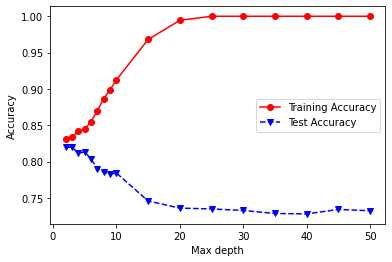

In [33]:
# Graph for decision tree tuning parameters

# Training and Test set creation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

# Model fitting and evaluation
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#### **Decision tree evaluation**


## **kNN**

### **Baseline kNN**

In [8]:
# exX = X[['X6','X5','X12','X1','X13','X14','X18','X15']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
# knn = KNeighborsClassifier(metric='minkowski', n_neighbors=21, p= 1, weights='uniform').fit(x_train, y_train)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))
print('Accuracy on test data is %.3f' % (accuracy_score(y_test, y_pred)))
print('ROC AUC score is %.3f' % (roc_auc_score(y_test, y_pred)))

precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      3480
         1.0       0.56      0.32      0.41      1020

    accuracy                           0.79      4500
   macro avg       0.69      0.63      0.64      4500
weighted avg       0.76      0.79      0.77      4500

Accuracy on test data is 0.790
ROC AUC score is 0.625


In [35]:
predY = knn.predict(testX)
predictions = pd.concat([testY, pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,Y,PredictedClass
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
14995,0.0,0.0
14996,0.0,0.0
14997,0.0,0.0
14998,1.0,1.0


In [36]:
print('Accuracy on test data is %.3f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.790


### **Tuned kNN**

In [53]:
n_neighbors = list(range(1,30))
#n_neighbors = list(range(1,30,5))
p=[1,2]
metrics = ['minkowski','euclidean','manhattan']
weights = ['uniform','distance']

hyperparameters = dict(metric=metrics, weights=weights, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=4)
best_knn_model_test = clf.fit(X,Y)
print ('best accuracy and parameters are', best_knn_model_test.best_score_, best_knn_model_test.best_params_)

best accuracy and parameters are 0.8091333333333333 {'metric': 'minkowski', 'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}


In [54]:
predY = best_knn_model.predict(testX)
predictions = pd.concat([testY, pd.Series(predY,name='PredictedClass')], axis=1)
predictions
print(classification_report(testY, predY))
print('Accuracy on test data is %.3f' % (accuracy_score(testY, predY)))
print('ROC AUC score is %.3f' % (roc_auc_score(testY, predY)))

precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     11682
         1.0       0.66      0.29      0.41      3318

    accuracy                           0.81     15000
   macro avg       0.74      0.63      0.65     15000
weighted avg       0.79      0.81      0.78     15000

Accuracy on test data is 0.811
ROC AUC score is 0.626


Text(0, 0.5, 'Accuracy')

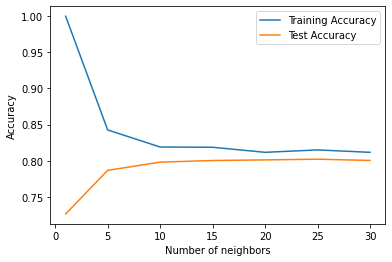

In [58]:
%matplotlib inline
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='uniform',p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, numNeighbors, testAcc)
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

## **Random Forest**

In [39]:
no_estimators = np.arange(95,110,5)
criterion = ['gini', 'entropy']
maxdepths = np.arange(2,15)
parameters = dict(n_estimators=[105],criterion=criterion,max_depth=maxdepths)
clf = GridSearchCV(RandomForestClassifier(),parameters, cv=10, n_jobs=4)
clf.fit(X,Y)
best_rf_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_) 

best accuracy and parameters are 0.8214666666666666 {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 105}


In [40]:
predY = best_rf_model.predict(testX)
predictions = pd.concat([testY, pd.Series(predY, name='Predicted Class')], axis=1)
predictions
print(classification_report(testY, predY))
print('Accuracy on test data is %.3f' % (accuracy_score(testY, predY)))
print('ROC AUC score is %.3f' % (roc_auc_score(testY, predY)))

precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     11682
         1.0       0.70      0.27      0.39      3318

    accuracy                           0.81     15000
   macro avg       0.76      0.62      0.64     15000
weighted avg       0.80      0.81      0.78     15000

Accuracy on test data is 0.813
ROC AUC score is 0.620


Text(0, 0.5, 'Accuracy')

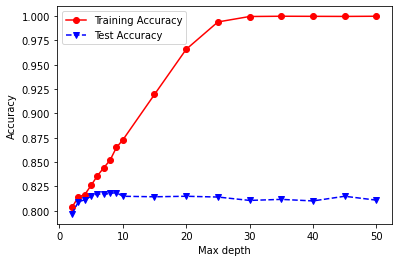

In [42]:
# Graph for random forest tuning parameters

# Training and Test set creation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

# Model fitting and evaluation
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
n_estimators = [105]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = RandomForestClassifier(max_depth=depth, criterion='gini', n_estimators=95)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

## **SVM**

In [66]:
#Baseline SVM
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [67]:
print(accuracy_score(y_test, y_pred))

0.8162222222222222


In [21]:
#Tuned SVM
kernel = ['linear', 'poly', 'rbf']
c = [1.0, 10.0]
gamma = [0.1, 1.0]
parameters = dict(kernel=kernel,gamma=gamma,C=c)
clf = GridSearchCV(svm.SVC(),parameters, cv=10, n_jobs=4)
clf.fit(X, Y)
best_svm_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_)

best accuracy and parameters are 0.8197333333333333 {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [22]:
predY = best_svm_model.predict(testX)
predictions = pd.concat([testY, pd.Series(predY,name='PredictedClass')], axis=1)
predictions
print(classification_report(testY, predY))
print('Accuracy on test data is %.3f' % (accuracy_score(testY, predY)))
print('ROC AUC score is %.3f' % (roc_auc_score(testY, predY)))

precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     11682
         1.0       0.73      0.22      0.34      3318

    accuracy                           0.81     15000
   macro avg       0.77      0.60      0.62     15000
weighted avg       0.80      0.81      0.77     15000

Accuracy on test data is 0.810
ROC AUC score is 0.600


Text(0, 0.5, 'Accuracy')

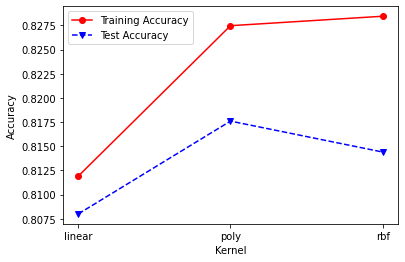

In [23]:
# Graph for svm tuning parameters

# Training and Test set creation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

# Model fitting and evaluation
kernel = ['linear', 'poly', 'rbf']

trainAcc = np.zeros(len(kernel))
testAcc = np.zeros(len(kernel))

index = 0
for k in kernel:
    clf = svm.SVC(kernel=k, C=10, gamma=1)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies    
plt.plot(kernel,trainAcc,'ro-',kernel,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')

## **AdaBoost**

In [69]:
#Baseline AdaBoost
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.818


In [26]:
#Tuned AdaBoost
n_estimators = [100,200]
lr = [0.001, 0.01, 0.1, 0.2, 0.5]
parameters = dict(n_estimators=n_estimators,learning_rate=lr)
clf = GridSearchCV(AdaBoostClassifier(),parameters, cv=10, n_jobs=4)
clf.fit(X=X, y=Y)
best_adaboost_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_)

best accuracy and parameters are 0.8219333333333333 {'learning_rate': 0.001, 'n_estimators': 100}


In [27]:
predY = best_adaboost_model.predict(testX)
predictions = pd.concat([testY, pd.Series(predY,name='PredictedClass')], axis=1)
predictions
print(classification_report(testY, predY))
print('Accuracy on test data is %.3f' % (accuracy_score(testY, predY)))
print('ROC AUC score is %.3f' % (roc_auc_score(testY, predY)))

precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     11682
         1.0       0.68      0.32      0.44      3318

    accuracy                           0.82     15000
   macro avg       0.76      0.64      0.67     15000
weighted avg       0.80      0.82      0.79     15000

Accuracy on test data is 0.817
ROC AUC score is 0.641


Text(0, 0.5, 'Accuracy')

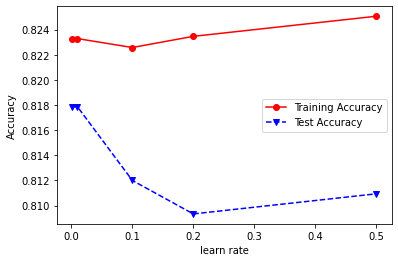

In [28]:
# Graph for AdaBoost tuning parameters

# Training and Test set creation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

# Model fitting and evaluation
learnrate = [0.001, 0.01, 0.1, 0.2, 0.5]

trainAcc = np.zeros(len(learnrate))
testAcc = np.zeros(len(learnrate))

index = 0
for lr in learnrate:
    clf = AdaBoostClassifier(learning_rate=lr, n_estimators=100)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies    
plt.plot(learnrate,trainAcc,'ro-',learnrate,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('learn rate')
plt.ylabel('Accuracy')

### **Misc.**

In [18]:
#Feature/predictor importance
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,Y)

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

X6     0.099746
X5     0.065153
X12    0.060372
X1     0.058519
X13    0.053987
X14    0.052428
X18    0.052093
X15    0.051733
X16    0.049926
X17    0.048932
X19    0.047368
X23    0.045774
X20    0.045129
X21    0.043296
X22    0.042955
X7     0.041990
X8     0.031682
X9     0.024787
X3     0.020894
X10    0.019443
X11    0.018013
X4     0.013729
X2     0.012050
dtype: float64

## **Conclusion**
Overall, I think that the best model is random forest due to being an ensemble based method so more independance especially compared to only decision tree by itself. Although, kNN & decision tree was able to model fast, the other algorithms took a little longer due to different amounts of hyperparameters and the amount of values used.